## COVID-19 in US Prisons

This notebook imports COVID-19 data from [data.world](https://data.world/), which has been compiled by the Associated Press and The Marshall Project.

**Taken from the data.world page:**
# Overview

The Marshall Project, the nonprofit investigative newsroom dedicated to the U.S. criminal justice system, has partnered with The Associated Press to compile data on the prevalence of COVID-19 infection in prisons across the country. The Associated Press is sharing this data as the most comprehensive current national source of COVID-19 outbreaks in state and federal prisons.

Lawyers, criminal justice reform advocates and families of the incarcerated have worried about what was happening in prisons across the nation as coronavirus began to take hold in the communities outside. Data collected by The Marshall Project and AP shows that hundreds of thousands of prisoners, workers, correctional officers and staff have caught the illness as prisons became the center of some of the country’s largest outbreaks. And thousands of people — most of them incarcerated — have died.

In December, as COVID-19 cases spiked across the U.S., the news organizations also shared cumulative rates of infection among prison populations, to better gauge the total effects of the pandemic on prison populations. The analysis found that by mid-December, one in five state and federal prisoners in the United States had tested positive for the coronavirus -- a rate more than four times higher than the general population.

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data imports
df_prisoncases = pd.read_csv('https://query.data.world/s/tp7acte5rwl6pw2yuyvkxnw3xwtq64')
df_prisonrates = pd.read_csv('https://query.data.world/s/7gtwvf7dkarwtdm336heetyv2ooyyz')
df_prisonpop = pd.read_csv('https://query.data.world/s/3o2mmakqdaprodkxbitvt5rnmdpeij')
df_staffpop = pd.read_csv('https://query.data.world/s/zz6zpqsvllsrg4gzvmervygkje7j7o')

# Checking the Data: Prison Cases

#### "Prison Cases "The time series data is aggregated to the system level; there is one record for each prison agency on each date of collection. Not all departments could provide data for the exact date requested, and the data indicates the date for the figures."

In [3]:
df_prisoncases.dtypes

name                              object
abbreviation                      object
staff_tests                      float64
staff_tests_with_multiples       float64
total_staff_cases                float64
staff_recovered                  float64
total_staff_deaths               float64
staff_partial_dose               float64
staff_full_dose                  float64
prisoner_tests                   float64
prisoner_tests_with_multiples    float64
total_prisoner_cases             float64
prisoners_recovered              float64
total_prisoner_deaths            float64
prisoners_partial_dose           float64
prisoners_full_dose              float64
as_of_date                        object
notes                             object
dtype: object

In [4]:
(df_prisoncases.isnull().sum()/df_prisoncases.shape[0])*100

name                              0.000000
abbreviation                      0.000000
staff_tests                      87.219888
staff_tests_with_multiples       81.967787
total_staff_cases                 7.738095
staff_recovered                  37.815126
total_staff_deaths               15.406162
staff_partial_dose               86.204482
staff_full_dose                  88.515406
prisoner_tests                   57.422969
prisoner_tests_with_multiples    55.287115
total_prisoner_cases              3.081232
prisoners_recovered              32.913165
total_prisoner_deaths             4.096639
prisoners_partial_dose           81.687675
prisoners_full_dose              83.683473
as_of_date                        1.015406
notes                            62.920168
dtype: float64

In [5]:
#dropping empty row (index 0)
df_prisoncases.drop(index=0, inplace=True)

In [6]:
#dropping null as_of_date
df_prisoncases.dropna(subset = ['as_of_date'], inplace=True)

In [7]:
df_prisoncases.head()

,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,staff_partial_dose,staff_full_dose,prisoner_tests,prisoner_tests_with_multiples,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,prisoners_partial_dose,prisoners_full_dose,as_of_date,notes
1,Alaska,AK,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,30387.0,2399.0,NaN,5.0,2677.0,1839.0,04/12/2021,Vaccination numbers as of 4/11
2,Arizona,AZ,NaN,NaN,2745.0,2732.0,NaN,NaN,NaN,46140.0,NaN,12263.0,12147.0,53.0,NaN,NaN,04/13/2021,We have been told vaccinations have begun in t...
4,California,CA,NaN,NaN,16284.0,16084.0,26.0,27539.0,25282.0,122071.0,NaN,49215.0,48369.0,220.0,65728.0,45865.0,04/13/2021,NaN
5,Colorado,CO,NaN,NaN,1650.0,NaN,0.0,2972.0,NaN,19368.0,200051.0,8827.0,NaN,29.0,9164.0,NaN,04/13/2021,NaN
6,Connecticut,CT,NaN,63062.0,1647.0,1613.0,0.0,2697.0,NaN,NaN,98599.0,4399.0,4328.0,19.0,4362.0,NaN,04/13/2021,NaN


### Convert to datetime
##### Prison Cases: Date column is an object datatype, we will need to convert it to the timeseries datatype

In [8]:
#converting columns to date time
df_prisoncases['as_of_date'] = pd.to_datetime(df_prisoncases['as_of_date'])

In [9]:
#setting column to index
df_prisoncases.set_index('as_of_date', inplace=True)

In [10]:
#sorting index
df_prisoncases.sort_index(inplace=True, ascending=True)

In [11]:
#Checking work
df_prisoncases.head(5)

,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,staff_partial_dose,staff_full_dose,prisoner_tests,prisoner_tests_with_multiples,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,prisoners_partial_dose,prisoners_full_dose,notes
as_of_date,,,,,,,,,,,,,,,,,
2020-03-23,Washington,WA,NaN,NaN,1145.0,NaN,2.0,NaN,NaN,NaN,NaN,6187.0,6169.0,14.0,NaN,NaN,We have been told vaccinations have begun in t...
2020-03-24,Delaware,DE,NaN,NaN,0.0,NaN,0.0,NaN,NaN,4.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2020-03-25,Illinois,IL,NaN,NaN,3.0,NaN,0.0,NaN,NaN,13.0,NaN,3.0,NaN,0.0,NaN,NaN,NaN
2020-03-26,Minnesota,MN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2020-03-26,Michigan,MI,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.0,NaN,0.0,NaN,NaN,NaN


## Exploring Missing Data
The data is system aggregated, so each row is a prison system with accompanying time series data. 

In [12]:
#percent of missing data in prison cases
(df_prisoncases.isnull().sum()/df_prisoncases.shape[0])*100

name                              0.000000
abbreviation                      0.000000
staff_tests                      87.084218
staff_tests_with_multiples       81.776362
total_staff_cases                 6.794055
staff_recovered                  37.190375
total_staff_deaths               14.543524
staff_partial_dose               86.093418
staff_full_dose                  88.393489
prisoner_tests                   56.970984
prisoner_tests_with_multiples    54.847841
total_prisoner_cases              2.087757
prisoners_recovered              32.236377
total_prisoner_deaths             3.113942
prisoners_partial_dose           81.528662
prisoners_full_dose              83.510262
notes                            62.774239
dtype: float64

In [13]:
# Drop staff_tests, staff_tests_with_multiples,staff_partial_dose,staff_full_dose, prisoner_tests, prisoner_tests_with_multiples
# prisoners_partial_dose, prisoners_full_dose, notes

In [14]:
df_prisoncases.drop(columns = ['staff_tests','staff_tests_with_multiples',
                               'staff_partial_dose','staff_full_dose',
                               'prisoner_tests', 'prisoner_tests_with_multiples',
                               'prisoners_partial_dose','prisoners_full_dose', 'notes'], inplace = True)

In [15]:
df_prisoncases.tail()

,name,abbreviation,total_staff_cases,staff_recovered,total_staff_deaths,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths
as_of_date,,,,,,,,
2021-04-15,Kansas,KS,1212.0,NaN,6.0,6101.0,NaN,16.0
2021-04-15,Iowa,IA,701.0,698.0,2.0,4849.0,4820.0,19.0
2021-04-16,Rhode Island,RI,448.0,440.0,1.0,1208.0,1196.0,2.0
2021-04-16,Maine,ME,NaN,NaN,0.0,170.0,NaN,1.0
2021-04-16,Nebraska,NE,NaN,NaN,NaN,982.0,NaN,6.0


In [16]:
(df_prisoncases.isnull().sum()/df_prisoncases.shape[0])*100

name                      0.000000
abbreviation              0.000000
total_staff_cases         6.794055
staff_recovered          37.190375
total_staff_deaths       14.543524
total_prisoner_cases      2.087757
prisoners_recovered      32.236377
total_prisoner_deaths     3.113942
dtype: float64

In [17]:
df_prisoncases.shape

(2826, 8)

### I will be utilizing Tableau for final data visualization. Below, I am creating an new excel file to export. Feel free to skip this step if you do not need a non-cumulative version of the data.

In [ ]:
#creating a new data file for Tableau Data Visualization
# df_prisoncases['prisoner_cases_noncum'] = df_prisoncases['total_prisoner_cases'].diff()

In [ ]:
#creating a new data file for Tableau Data Visualization
df_prisoncases.groupby(by='name').sum()

In [ ]:
df_prisoncases.to_excel('./all_cases.xlsx')

# New Jersey

In [20]:
New_Jersey = pd.DataFrame(df_prisoncases[df_prisoncases['name']=='New Jersey'])

In [21]:
New_Jersey.sort_index(ascending = True, inplace = True)

In [22]:
New_Jersey.isnull().sum()

name                      0
abbreviation              0
total_staff_cases         0
staff_recovered          45
total_staff_deaths       43
total_prisoner_cases      0
prisoners_recovered      56
total_prisoner_deaths     1
dtype: int64

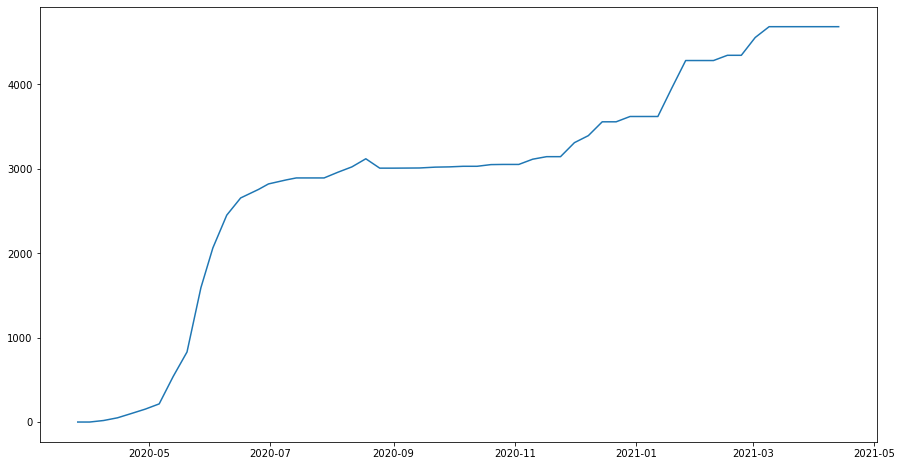

In [23]:
#Plot prisoner cases over time
plt.figure(figsize = (15,8))
plt.plot(New_Jersey['total_prisoner_cases'])

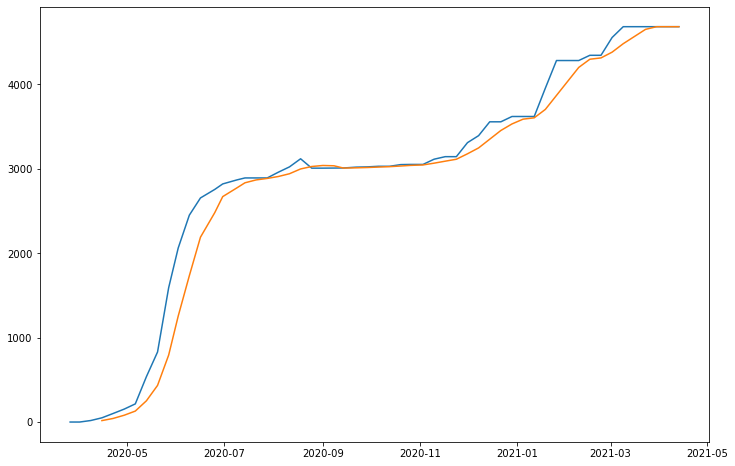

In [24]:
#Plot prisoner cases over time + rolling average (4 weeks)

plt.figure(figsize=(12,8))
plt.plot(New_Jersey['total_prisoner_cases'])
plt.plot(New_Jersey['total_prisoner_cases'].rolling(4).mean())

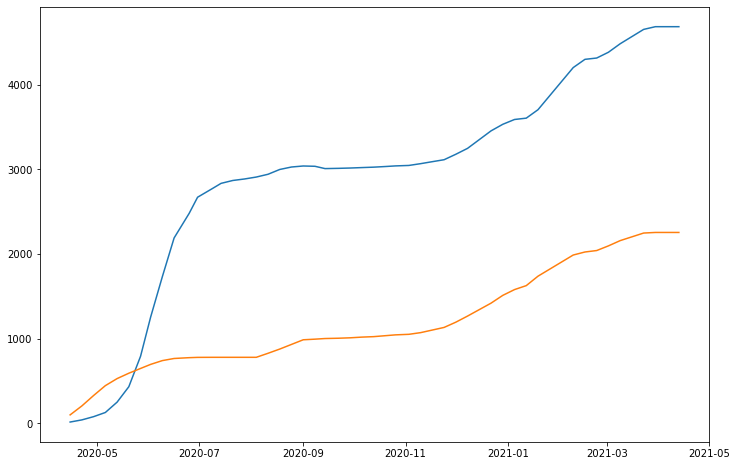

In [25]:
#Plot Prisoner vs. Staff rolling average (4 weeks)
plt.figure(figsize=(12,8))
plt.plot(New_Jersey['total_prisoner_cases'].rolling(4).mean())
plt.plot(New_Jersey['total_staff_cases'].rolling(4).mean())

In [26]:
df_prisonrates.head()

,name,latest_week,cumulative_prisoner_cases,prisoner_cases_pct,prisoner_case_rate,cumulative_prisoner_deaths,prisoner_deaths_pct,prisoner_death_rate,cumulative_staff_cases,staff_cases_pct,staff_case_rate,cumulative_staff_deaths,staff_deaths_pct,staff_death_rate
0,Alabama,04/13/2021,1635,0.077437,1 in 13 prisoners,65,0.003079,1 in 325 prisoners,1044,0.275316,1 in 4 staff,3,0.000791,1 in 1264 staff
1,Alaska,04/13/2021,2399,0.502303,1 in 2 prisoners,5,0.001047,1 in 955 prisoners,313,0.211344,1 in 5 staff,0,0.000000,0
2,Arizona,04/13/2021,12263,0.289495,2 in 7 prisoners,53,0.001251,1 in 799 prisoners,2745,0.301814,1 in 3 staff,1,0.000110,1 in 9095 staff
3,Arkansas,04/13/2021,11245,0.642498,2 in 3 prisoners,52,0.002971,1 in 337 prisoners,813,0.148901,1 in 7 staff,4,0.000733,1 in 1365 staff
4,California,04/13/2021,49215,0.418356,2 in 5 prisoners,220,0.001870,1 in 535 prisoners,16284,0.256558,1 in 4 staff,26,0.000410,1 in 2441 staff


In [27]:
#Using prisoner population data to create a new table with just new jersey

In [28]:
new_jersey_prisoner_population = pd.DataFrame(df_prisonpop[df_prisonpop['name']=='New Jersey'])

In [29]:
#dropping as of date columns
new_jersey_prisoner_population.drop(columns= ['as_of_date_march', 'as_of_date_april', 'as_of_date_june', 'as_of_date_july', 'as_of_date_aug', 'as_of_date_sept', 'as_of_date_oct', 'as_of_date_nov', 'as_of_date_dec'], inplace=True)




In [30]:
#Saving as a transposed Data Frame
new_jersey_prisoner_population = pd.DataFrame(new_jersey_prisoner_population.T)

In [31]:
#Renaming the columns to population
new_jersey_prisoner_population.rename(columns = {29: 'population'}, inplace=True)

In [32]:
#Dropping erroneous rows from index
new_jersey_prisoner_population.drop(index = ['name', 'abbreviation'], inplace=True)

In [33]:
#renaming the index
new_jersey_prisoner_population.index.rename('index', inplace=True)

In [34]:
#Month dictionary
month_dict = {'march_pop': 'march-2020', 'april_pop': 'april-2020', 'june_pop': 'june-2020', 'july_pop': 'july-2020', 'aug_pop': 'august-2020', 'sept_pop': 'september-2020', 'oct_pop': 'october-2020', 'nov_pop': 'november-2020', 'dec_pop': 'december-2020'}

In [35]:
#renaming the index
new_jersey_prisoner_population.rename(index = month_dict, inplace=True)

In [36]:
#Change to date time data type
new_jersey_prisoner_population.index = pd.to_datetime(new_jersey_prisoner_population.index)

In [37]:
#drop unecessary columns
New_Jersey.drop(columns=['name', 'abbreviation'], inplace = True)

In [38]:
New_Jersey['total_prisoner_deaths'].fillna(value = 0,inplace=True)

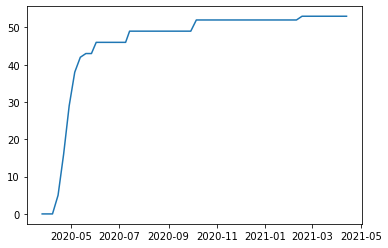

In [39]:
plt.plot(New_Jersey['total_prisoner_deaths'])

# Saving to CSV

In [41]:
New_Jersey.to_csv('./cleaned_data/new_jersey')

In [42]:
new_jersey_prisoner_population.to_csv('./cleaned_data/new_jersey_prisoner_population')